from thesis_figures/Fig4_0

In [1]:
import sys
sys.path.append('/Users/celia/GitHub/mouse_bandit/data_preprocessing_code')
sys.path.append('/Users/celia/GitHub/mouse_bandit')
import support_functions as sf
import numpy as np
import pandas as pd
import scipy as sp
import bandit_preprocessing as bp
import sys
import os
import matplotlib
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline

In [2]:
record = pd.read_csv('/Users/celia/GitHub/mouse_bandit/celia_session_record.csv',index_col=0)

In [20]:
y.shape

(5, 10)

5


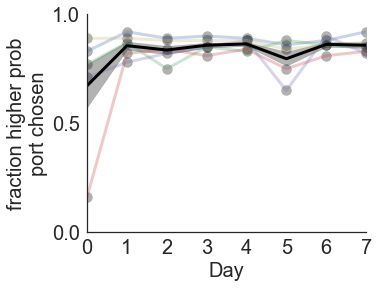

In [21]:
#mice = ['Baby','Sky','Raspberry','Wine','Mustard']
mice = np.unique(record['Mouse ID'].values) # get names of all mice in record
#mice = np.delete(mice,np.where(mice=='dumble'))
#mice = np.delete(mice,np.where(mice=='harry'))

print(mice.shape[0])
sns.set_style('white')
plt.figure(figsize=(5,4))
y = np.empty((mice.shape[0],10))
x = np.arange(0,10) # number of days to plot
k = 0 
for i,mouse in enumerate(mice):
    y_temp = record[((record['Mouse ID'] == mouse) & ((record['Left Reward Prob'] == 0.9) | (record['Left Reward Prob'] == 0.1)))]['p(high Port)'].values
    try:
        y[k,:] = y_temp[-10:] # values of fraction high port chosen for last 10 days
        plt.plot(x,y[k,:],label=mouse,alpha=0.3,linewidth=3)
        plt.scatter(x,y[k,:],label=mouse,alpha=0.3,s=100,color='black')
        k+=1
    except:
        print(mouse)

plt.plot(x,y.mean(axis=0),color='black',linewidth=3)
err = y.std(axis=0)/np.sqrt(7)
plt.fill_between(x,y1=y.mean(axis=0)+err,y2=y.mean(axis=0)-err,color='black',alpha=0.3)
plt.ylim(0,1)
plt.xlim(0,7)
plt.xticks(fontsize=20)
plt.yticks([0,0.5,1],fontsize=20)
plt.xlabel('Day',fontsize=20)
plt.ylabel('fraction higher prob\nport chosen',fontsize=20)
#plt.legend(loc='best')
sns.despine(top='True')

In [22]:
columns = ['Elapsed Time (s)','Since last trial (s)','Trial Duration (s)','Port Poked','Right Reward Prob','Left Reward Prob','Reward']
data = pd.read_csv('/Users/celia/GitHub/mouse_bandit/data/trial_data/09262017_Baby_trials.csv',names=columns)

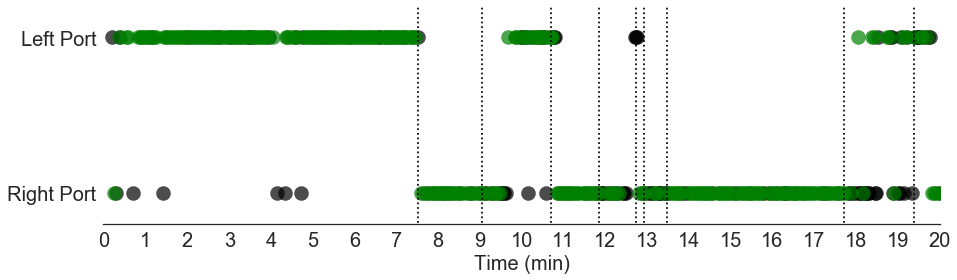

In [23]:
block_start_trials = np.where(np.abs(np.diff(data['Right Reward Prob'].values))!=0)
block_start_times = data['Elapsed Time (s)'].values[block_start_trials[0]]

num_trials = 1600
sns.set_style('white')
plt.figure(figsize=(15,4))
plt.vlines(block_start_times,ymin=0,ymax=3,linestyle='dotted')
plt.scatter(data[data['Reward'] == 0]['Elapsed Time (s)'].values[:num_trials],
            data[data['Reward'] == 0]['Port Poked'].values[:num_trials],color='black',s=200,alpha=0.7)
plt.scatter(data[data['Reward'] == 1]['Elapsed Time (s)'].values[:num_trials],
            data[data['Reward'] == 1]['Port Poked'].values[:num_trials],color='green',s=200,alpha=0.7)
plt.xticks(np.arange(0,1700,60),list(map(int,np.arange(0,1700/60))),fontsize=20)
plt.yticks([1,2],['Right Port','Left Port'],fontsize=20)
plt.xlim(-1,1201)
plt.xlabel('Time (min)',fontsize=20)
plt.ylim(0.8,2.2)
sns.despine(left=True)
#fig_name = '/Users/shayneufeld/Dropbox/Thesis/CHPT4/Figures/singlesession.eps'
#plt.savefig(fig_name, format='eps', dpi=1000)

In [24]:
data90 = pd.read_csv('/Users/celia/GitHub/mouse_bandit/data/processed_data/markov_9010_df.csv',index_col=0)
data80 = pd.read_csv('/Users/celia/GitHub/mouse_bandit/data/processed_data/markov_8020_df.csv',index_col=0)
#data70 = pd.read_csv('/Users/shayneufeld/GitHub/mouse_bandit/data/processed_data/full_7030_02192017.csv',index_col=0)
data90['Condition'] = '90-10'
data80['Condition'] = '80-20'
#data70['Condition'] = '70-30'
datas = data90.append(data80)
#datas = datas.append(data70)

In [7]:
datas = pd.read_csv('/Users/shayneufeld/GitHub/mouse_bandit/data/processed_data/master_data.csv',index_col=0)

In [25]:
datas.head(100)

,Session ID,Trial,Block Trial,Block Reward,Port Streak,Reward Streak,10_Port,10_Reward,10_ITI,10_trialDuration,...,1_Reward,1_ITI,1_trialDuration,0_ITI,0_trialDuration,Decision,Switch,Higher p port,Reward,Condition
Mouse ID,,,,,,,,,,,,,,,,,,,,,
Baby,08162017_Baby,11.0,11.0,6.0,1.0,2.0,0.0,1.0,4.013,1.231,...,1.0,1.849,0.430,1.277,0.557,0.0,0.0,1.0,1.0,90-10
Baby,08162017_Baby,12.0,12.0,7.0,2.0,3.0,1.0,0.0,1.845,0.802,...,1.0,1.277,0.557,46.032,0.383,1.0,1.0,0.0,0.0,90-10
Baby,08162017_Baby,13.0,13.0,7.0,1.0,-1.0,0.0,0.0,1.281,0.619,...,0.0,46.032,0.383,1.413,0.447,1.0,0.0,0.0,0.0,90-10
Baby,08162017_Baby,14.0,14.0,7.0,2.0,-2.0,0.0,1.0,1.850,0.593,...,0.0,1.413,0.447,5.433,0.488,1.0,0.0,0.0,1.0,90-10
Baby,08162017_Baby,15.0,15.0,8.0,3.0,1.0,1.0,0.0,2.444,0.677,...,1.0,5.433,0.488,2.283,0.391,1.0,0.0,0.0,0.0,90-10
Baby,08162017_Baby,16.0,16.0,8.0,4.0,-1.0,1.0,1.0,63.232,0.465,...,0.0,2.283,0.391,18.588,0.690,1.0,0.0,0.0,0.0,90-10
Baby,08162017_Baby,17.0,17.0,8.0,5.0,-2.0,0.0,1.0,3.139,0.559,...,0.0,18.588,0.690,26.320,0.659,0.0,1.0,1.0,1.0,90-10
Baby,08162017_Baby,18.0,18.0,9.0,1.0,1.0,1.0,0.0,22.686,0.649,...,1.0,26.320,0.659,28.204,0.470,1.0,1.0,0.0,0.0,90-10
Baby,08162017_Baby,19.0,19.0,9.0,1.0,-1.0,1.0,1.0,14.418,0.651,...,0.0,28.204,0.470,1.591,0.413,0.0,1.0,1.0,1.0,90-10


In [58]:
#ax2 = sns.barplot(x='Condition',y='Higher p port',data=datas)
plt.figure(figsize=(5,4))
ax1 = sns.barplot(x='Condition',y='Higher p port',data=datas[datas['Condition'] != '100-0'])#,hue='Mouse ID')
plt.yticks([0,0.5,1.0],fontsize=20)
plt.xticks(fontsize=20)
plt.ylabel('Percent high-rewarded port')
plt.xlabel('')
#ax1.legend_.remove()
sns.despine()

ValueError: cannot reindex from a duplicate axis

In [32]:
session_ids = np.unique(datas['Session ID'].values)
#session_ids = ['01182017_q43']
block_trials_ = np.array([])
for session in session_ids:
    data = datas[datas['Session ID']==session].copy()
    block_ends = data['Trial'].values[np.where(data['Block Trial'].values==0)[0]]
    
    for trial in data.iterrows():
        try:
            block_trial = block_ends[np.where(block_ends > trial[1]['Trial'])[0][0]] - trial[1]['Block Trial']
        except:
            block_trial = 0
        block_trials_ = np.append(block_trials_,block_trial)

In [33]:
datas['Block Trial Rev'] = block_trials_

In [56]:
datas[datas['Condition']=='90-10'].index

Index(['Baby', 'Baby', 'Baby', 'Baby', 'Baby', 'Baby', 'Baby', 'Baby', 'Baby',
       'Baby',
       ...
       'Wine', 'Wine', 'Wine', 'Wine', 'Wine', 'Wine', 'Wine', 'Wine', 'Wine',
       'Wine'],
      dtype='object', name='Mouse ID', length=41863)

In [50]:
block_trials = np.unique(datas['Block Trial'].values)
conditions = np.unique(datas['Condition'].values)
mice = np.unique(datas.index)
p = np.zeros((block_trials.shape[0],2))
trial_stats = pd.DataFrame(data=None)
for condition in conditions:
        for i,trial in enumerate(block_trials):
            d = datas[datas['Condition']==condition]
            #d = d[d['Mouse ID']==mouse]
            d = d[d['Block Trial']==trial]
            '''
            boolean = (((datas['Block Trial'] == trial) 
                    & (datas['Condition']==condition))
                    & (datas['Mouse ID'] == mouse))
            
            t = datas[boolean]['Higher p port'].values
            '''
            t = d['Higher p port'].values
            p[i,0] = t.mean()
            p[i,1] = t.std()/np.sqrt(t.shape[0])

            d = {'Condition':condition,'trial':trial,
                 'mean':t.mean(),'sem':t.std()/np.sqrt(t.shape[0]),'n':t.shape[0]}
            trial_stats = trial_stats.append(pd.DataFrame(data=d,index=[0]))

/Users/celia/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:19: RuntimeWarning: Mean of empty slice.
/Users/celia/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/celia/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/celia/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:105: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/Users/celia/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/celia/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: Mean of empty slice.


In [13]:
block_trials_rev = np.unique(datas['Block Trial Rev'].values)
conditions = np.unique(datas['Condition'].values)
p = np.zeros((block_trials_rev.shape[0],2))
trial_stats_ = pd.DataFrame(data=None)

for condition in conditions:
    for i,trial in enumerate(block_trials_rev):
        t = datas[((datas['Block Trial Rev'] == trial) 
                   & (datas['Condition']==condition))]['Higher p port'].values
        p[i,0] = t.mean()
        p[i,1] = t.std()/np.sqrt(t.shape[0])
    
        d = {'Condition':condition,'trial':trial,'mean':t.mean(),'sem':t.std()/np.sqrt(t.shape[0]),'n':t.shape[0]}
        trial_stats_ = trial_stats_.append(pd.DataFrame(data=d,index=[0]))
        
trial_stats_['trial'] = trial_stats_['trial']*-1

//anaconda/envs/CaGRIN/lib/python3.5/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
//anaconda/envs/CaGRIN/lib/python3.5/site-packages/numpy/core/_methods.py:82: RuntimeWarning: Degrees of freedom <= 0 for slice
  warnings.warn("Degrees of freedom <= 0 for slice", RuntimeWarning)


([<matplotlib.axis.XTick at 0x113d6ea90>,
 <a list of 3 Text xticklabel objects>)

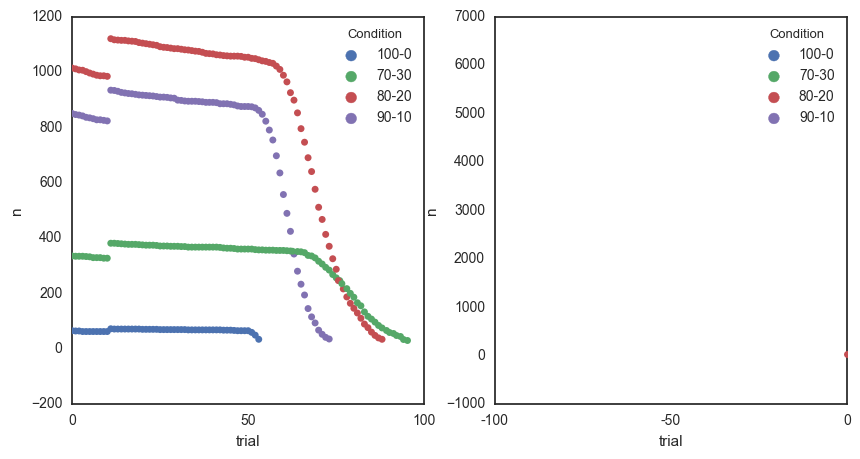

In [14]:
trial_stats = trial_stats[trial_stats['n'] > 30]
trial_stats_ = trial_stats_[trial_stats_['n'] > 30]

plt.figure(figsize=(10,5))
plt.subplot(121)
sns.swarmplot(x='trial',y='n',hue='Condition',data=trial_stats)
plt.xlim(0,100)
plt.xticks([0,50,100],[0,50,100])

plt.subplot(122)
sns.swarmplot(x='trial',y='n',hue='Condition',data=trial_stats_)
plt.xlim(-100,0)
plt.xticks([0,-50,-100],[0,-50,-100])

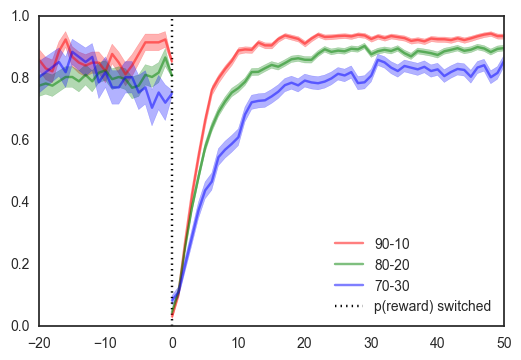

In [15]:
colors = ['red','green','blue','purple']
conditions=['90-10','80-20','70-30']

for i,condition in enumerate(conditions):
    trial_stat = trial_stats[trial_stats['Condition']==condition]
    trial_stat_ = trial_stats_[trial_stats_['Condition']==condition]
    u = trial_stat['mean'].values
    e = trial_stat['sem'].values
    x = trial_stat['trial'].values
    
    u_ = trial_stat_['mean'].values
    e_ = trial_stat_['sem'].values
    x_ = trial_stat_['trial'].values
    
    plt.plot(x,u,color=colors[i],alpha=0.5,label=condition)
    plt.fill_between(x,y1=u-e,y2=u+e,color=colors[i],alpha=0.3)
    
    plt.plot(x_,u_,color=colors[i],alpha=0.5)
    plt.fill_between(x_,y1=u_-e_,y2=u_+e_,color=colors[i],alpha=0.3)
    
plt.vlines(x=0,ymin=0,ymax=1,linestyle='dotted',label='p(reward) switched')

plt.xlim(-20,50)
plt.legend(loc='lower right')

In [16]:
conditions = ['90-10','80-20','70-30']
u_avg_ = np.zeros(3)
e_avg_ = np.zeros(3)
for i,condition in enumerate(conditions):
    trials = trial_stats_[((trial_stats_['trial'] > -15) 
                           & (trial_stats_['trial'] < 0)
                           & (trial_stats_['Condition']==condition))]
    
    u_avg_[i] = trials['mean'].mean()
    e_avg_[i] = np.sqrt(np.sum(trials['sem'].values**2) / (trials.shape[0]-1))

In [17]:
np.where(u >= u_avg_[2])

(array([20, 23, 24, 25, 26, 27, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40,
        41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57,
        58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74,
        75, 76, 77, 78, 79, 80, 81]),)

In [18]:
stats = pd.DataFrame()
for c in conditions:
    for mouse in mice:
        d = datas[((datas['Condition'] == c) & (datas['Mouse ID'] == mouse))]
        if (d['Session ID'].unique().shape[0] > 1):
            s = bp.extract_session_stats(d)
            s['mouse'] = mouse
            s['condition'] = c
            s['n_trials'] = d.shape[0]
            s['n_sessions'] = d['Session ID'].unique().shape[0]
            stats = stats.append(s)

/Users/shayneufeld/GitHub/mouse_bandit/data_preprocessing_code/bandit_preprocessing.py:502: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  p_switch_block[t,0] = switches.mean(axis=0)
/Users/shayneufeld/GitHub/mouse_bandit/data_preprocessing_code/bandit_preprocessing.py:503: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  p_switch_block[t,1] = switches.std(axis=0) / np.sqrt(switches.shape[0])
/Users/shayneufeld/GitHub/mouse_bandit/data_preprocessing_code/bandit_preprocessing.py:506: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  high_p_port[t,0] = highport.mean(axis=0)
/Users/shayneufeld/GitHub/mouse_bandit/data_preprocessing_code/bandit_preprocessing.py:507: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  high_p_port

In [19]:
stats

,peak_pswitch,rebias_tau,stable_phigh,stable_pswitch,mouse,condition,n_trials,n_sessions
0,0.251572,3.619589,0.938994,0.060377,K1,90-10,10170,23
0,0.182432,5.047106,0.953378,0.050000,K13,90-10,9770,19
0,0.202020,3.382258,0.942424,0.054545,K7,90-10,6563,13
0,0.380952,4.540438,0.914286,0.114286,K9,90-10,1544,4
0,0.388889,3.032817,0.916667,0.050000,Q43,90-10,1162,3
0,0.305556,3.628396,0.961111,0.044444,Q45,90-10,2328,5
0,0.317073,5.640744,0.878049,0.090244,q40,90-10,2691,6
0,0.253086,3.839844,0.935185,0.048765,q43,90-10,10466,20
0,0.330275,3.892606,0.940367,0.065138,q45,90-10,7348,15
0,0.194444,5.187390,0.923611,0.068056,K1,80-20,5120,11


//anaconda/envs/CaGRIN/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


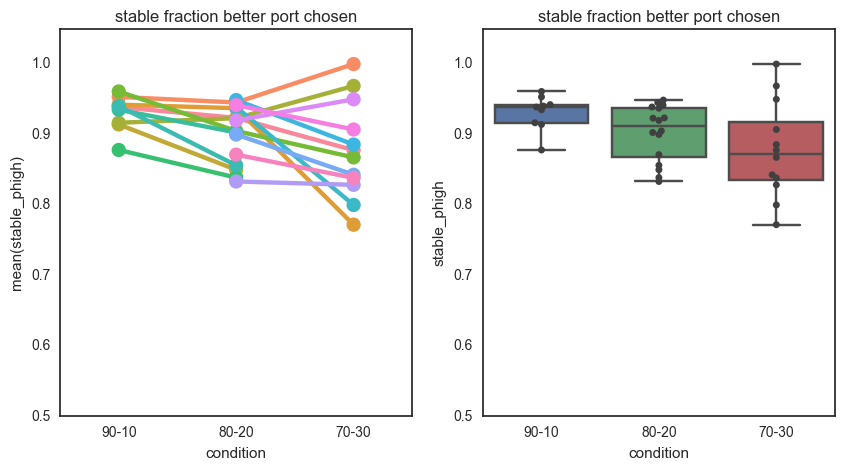

In [20]:
plt.figure(figsize=(10,5))

plt.subplot(121)
sns.pointplot(x='condition',y='stable_phigh',hue='mouse',data=stats)
plt.legend(bbox_to_anchor=(1.5,1))
plt.ylim(0.5,1.05)
plt.title('stable fraction better port chosen')

plt.subplot(122)
sns.boxplot(x='condition',y='stable_phigh',data=stats)
sns.swarmplot(x='condition',y='stable_phigh',data=stats,color='.25')
plt.legend(bbox_to_anchor=(1.5,1))
plt.ylim(0.5,1.05)
plt.title('stable fraction better port chosen')

//anaconda/envs/CaGRIN/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


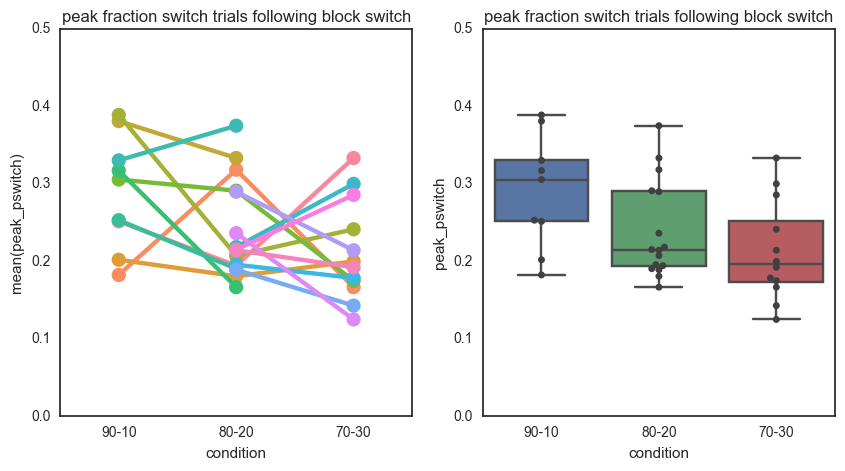

In [21]:
plt.figure(figsize=(10,5))

plt.subplot(121)
sns.pointplot(x='condition',y='peak_pswitch',hue='mouse',data=stats)
plt.legend(bbox_to_anchor=(1.5,1))
plt.ylim(0,.5)
plt.title('peak fraction switch trials following block switch')

plt.subplot(122)
sns.boxplot(x='condition',y='peak_pswitch',data=stats)
sns.swarmplot(x='condition',y='peak_pswitch',data=stats,color='.25')
plt.legend(bbox_to_anchor=(1.5,1))
plt.ylim(0,.5)
plt.title('peak fraction switch trials following block switch')

//anaconda/envs/CaGRIN/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


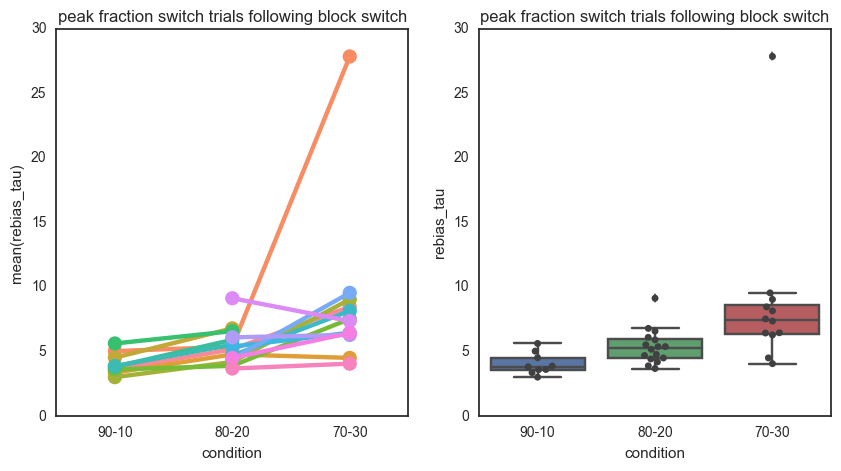

In [22]:
plt.figure(figsize=(10,5))

plt.subplot(121)
sns.pointplot(x='condition',y='rebias_tau',hue='mouse',data=stats)
plt.legend(bbox_to_anchor=(1.5,1))
#plt.ylim(0.5,1.05)
plt.title('peak fraction switch trials following block switch')

plt.subplot(122)
sns.boxplot(x='condition',y='rebias_tau',data=stats)
sns.swarmplot(x='condition',y='rebias_tau',data=stats,color='0.25')
plt.legend(bbox_to_anchor=(1.5,1))
#plt.ylim(0.5,1.05)
plt.title('peak fraction switch trials following block switch')